In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import keras 
import tensorflow as tf

In [2]:
DataSet = pd.read_csv("energy_train_1d_dirty.csv", sep=";")

In [3]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518395 entries, 0 to 518394
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   eqp_id     518395 non-null  int64  
 1   value_max  259195 non-null  float64
 2   value_avg  259195 non-null  float64
 3   value_min  259195 non-null  float64
 4   from_ts    518395 non-null  object 
 5   to_ts      518395 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 23.7+ MB


In [4]:
eqp_ID = DataSet["eqp_id"]
print(eqp_ID)

0         4531
1         4531
2         4531
3         4531
4         4531
          ... 
518390    4433
518391    4433
518392    4433
518393    4433
518394    4433
Name: eqp_id, Length: 518395, dtype: int64


In [5]:
index = np.where(DataSet["eqp_id"] == eqp_ID[0])
DataSet_for_certain_tools = DataSet.iloc[index[0], ].dropna()

<AxesSubplot:xlabel='from_ts'>

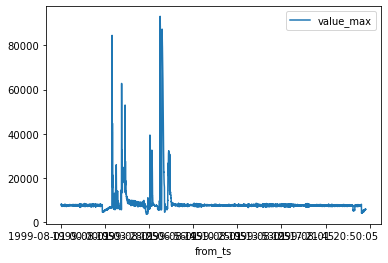

In [6]:
DataSet_for_certain_tools.plot(x = "from_ts", y = "value_max")

In [7]:
DataSet_for_certain_tools.drop(columns=["eqp_id"], inplace=True)

In [8]:
DataSet_for_certain_tools

,value_max,value_avg,value_min,from_ts,to_ts
0,8260.667969,6139.326660,3917.091309,1999-08-01 00:00:05,1999-08-01 00:00:10
1,8282.814453,5756.913086,4269.579102,1999-08-01 00:00:10,1999-08-01 00:00:15
2,8261.721680,6040.891113,3910.502441,1999-08-01 00:00:15,1999-08-01 00:00:20
3,7906.354004,5284.814941,3521.319824,1999-08-01 00:00:20,1999-08-01 00:00:25
4,7532.439941,5586.362793,3552.864746,1999-08-01 00:00:25,1999-08-01 00:00:30
...,...,...,...,...,...
17306,5846.026367,3437.829834,1088.334106,1999-08-01 23:59:35,1999-08-01 23:59:40
17307,5878.020996,3072.292480,1184.676270,1999-08-01 23:59:40,1999-08-01 23:59:45
17308,5999.944336,3504.402344,1281.319824,1999-08-01 23:59:45,1999-08-01 23:59:50
17309,5977.144043,3155.594727,1291.873291,1999-08-01 23:59:50,1999-08-01 23:59:55


## Finding dynamics - As inputs 

### ACF of value_max 

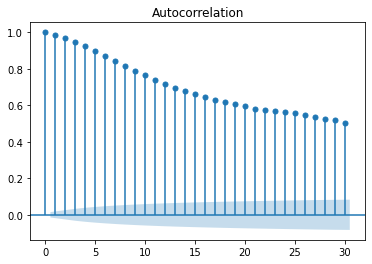

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.tsa.stattools as smt
plot_acf(DataSet_for_certain_tools["value_max"], lags=30)
plt.show()

### ACF of value_min 

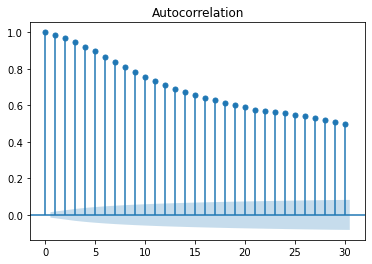

In [10]:
plot_acf(DataSet_for_certain_tools["value_min"], lags=30)
plt.show()

### ACF of value_avg

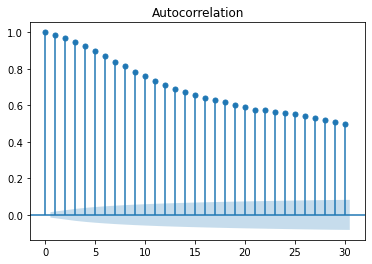

In [11]:
plot_acf(DataSet_for_certain_tools["value_avg"], lags=30)
plt.show()

### CCF of value_max with value_min

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'ACF')

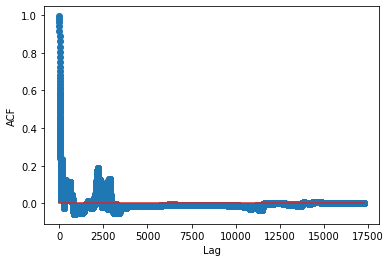

In [12]:
ccf_output = smt.ccf(DataSet_for_certain_tools["value_max"], DataSet_for_certain_tools['value_min'], unbiased=False)
plt.stem(ccf_output)
plt.xlabel('Lag')
plt.ylabel('ACF')

In [13]:
index = np.where(ccf_output >= 0.8)
index

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),)

### Input creation

In [14]:
X = pd.DataFrame()
columns = ["value_max", "value_min", "value_avg"]
for col in columns:
    for i in range(1, 10):
        X[col + str(i)] = DataSet_for_certain_tools[col].shift(i)

In [15]:
X

,value_max1,value_max2,value_max3,value_max4,value_max5,value_max6,value_max7,value_max8,value_max9,value_min1,...,value_min9,value_avg1,value_avg2,value_avg3,value_avg4,value_avg5,value_avg6,value_avg7,value_avg8,value_avg9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8260.667969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3917.091309,...,NaN,6139.326660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8282.814453,8260.667969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4269.579102,...,NaN,5756.913086,6139.326660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8261.721680,8282.814453,8260.667969,NaN,NaN,NaN,NaN,NaN,NaN,3910.502441,...,NaN,6040.891113,5756.913086,6139.326660,NaN,NaN,NaN,NaN,NaN,NaN
4,7906.354004,8261.721680,8282.814453,8260.667969,NaN,NaN,NaN,NaN,NaN,3521.319824,...,NaN,5284.814941,6040.891113,5756.913086,6139.326660,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17306,5863.239746,5857.450195,5847.803711,5915.695312,5736.268066,5817.301270,5708.414062,5809.827148,5726.842285,873.205261,...,783.584351,3058.336182,3429.394287,3028.612549,3408.129639,2967.026855,3428.733887,2927.156250,3397.703125,2913.154541
17307,5846.026367,5863.239746,5857.450195,5847.803711,5915.695312,5736.268066,5817.301270,5708.414062,5809.827148,1088.334106,...,803.707764,3437.829834,3058.336182,3429.394287,3028.612549,3408.129639,2967.026855,3428.733887,2927.156250,3397.703125
17308,5878.020996,5846.026367,5863.239746,5857.450195,5847.803711,5915.695312,5736.268066,5817.301270,5708.414062,1184.676270,...,826.637573,3072.292480,3437.829834,3058.336182,3429.394287,3028.612549,3408.129639,2967.026855,3428.733887,2927.156250
17309,5999.944336,5878.020996,5846.026367,5863.239746,5857.450195,5847.803711,5915.695312,5736.268066,5817.301270,1281.319824,...,771.510803,3504.402344,3072.292480,3437.829834,3058.336182,3429.394287,3028.612549,3408.129639,2967.026855,3428.733887


In [16]:
DataSet_for_certain_tools.drop(columns=["from_ts", "to_ts"], inplace=True)


In [19]:
newDataSet = pd.concat((X, DataSet_for_certain_tools, ), axis=1)
newDataSet.dropna(inplace=True)

In [20]:
newDataSet

,value_max1,value_max2,value_max3,value_max4,value_max5,value_max6,value_max7,value_max8,value_max9,value_min1,...,value_avg3,value_avg4,value_avg5,value_avg6,value_avg7,value_avg8,value_avg9,value_max,value_avg,value_min
9,7504.883301,7492.194336,7489.648926,7531.726074,7532.439941,7906.354004,8261.721680,8282.814453,8260.667969,3506.705811,...,5596.406250,5017.909668,5586.362793,5284.814941,6040.891113,5756.913086,6139.326660,7466.208008,4997.329102,3519.320312
10,7466.208008,7504.883301,7492.194336,7489.648926,7531.726074,7532.439941,7906.354004,8261.721680,8282.814453,3519.320312,...,5005.260742,5596.406250,5017.909668,5586.362793,5284.814941,6040.891113,5756.913086,7454.957520,5553.007324,3430.449707
11,7454.957520,7466.208008,7504.883301,7492.194336,7489.648926,7531.726074,7532.439941,7906.354004,8261.721680,3430.449707,...,5601.186523,5005.260742,5596.406250,5017.909668,5586.362793,5284.814941,6040.891113,7550.724609,4978.400391,3470.150879
12,7550.724609,7454.957520,7466.208008,7504.883301,7492.194336,7489.648926,7531.726074,7532.439941,7906.354004,3470.150879,...,4997.329102,5601.186523,5005.260742,5596.406250,5017.909668,5586.362793,5284.814941,7633.627930,5753.949707,3633.535156
13,7633.627930,7550.724609,7454.957520,7466.208008,7504.883301,7492.194336,7489.648926,7531.726074,7532.439941,3633.535156,...,5553.007324,4997.329102,5601.186523,5005.260742,5596.406250,5017.909668,5586.362793,7622.037109,5118.369141,3639.911377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17306,5863.239746,5857.450195,5847.803711,5915.695312,5736.268066,5817.301270,5708.414062,5809.827148,5726.842285,873.205261,...,3028.612549,3408.129639,2967.026855,3428.733887,2927.156250,3397.703125,2913.154541,5846.026367,3437.829834,1088.334106
17307,5846.026367,5863.239746,5857.450195,5847.803711,5915.695312,5736.268066,5817.301270,5708.414062,5809.827148,1088.334106,...,3429.394287,3028.612549,3408.129639,2967.026855,3428.733887,2927.156250,3397.703125,5878.020996,3072.292480,1184.676270
17308,5878.020996,5846.026367,5863.239746,5857.450195,5847.803711,5915.695312,5736.268066,5817.301270,5708.414062,1184.676270,...,3058.336182,3429.394287,3028.612549,3408.129639,2967.026855,3428.733887,2927.156250,5999.944336,3504.402344,1281.319824
17309,5999.944336,5878.020996,5846.026367,5863.239746,5857.450195,5847.803711,5915.695312,5736.268066,5817.301270,1281.319824,...,3437.829834,3058.336182,3429.394287,3028.612549,3408.129639,2967.026855,3428.733887,5977.144043,3155.594727,1291.873291


## Feature selection 

In [23]:
X = newDataSet.drop(columns=["value_max", "value_min", "value_avg"], inplace=False).values
y = newDataSet[["value_max", "value_min", "value_avg"]].values

## Test train splitting and preprocessing

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler_x, scaler_y = StandardScaler().fit(X_train), StandardScaler().fit(y_train)
X_train, X_test = scaler_x.transform(X_train), scaler_x.transform(X_test)
y_train, y_test = scaler_y.transform(y_train), scaler_y.transform(y_test)

## Model creation - Structure optimization

Epoch 1/20
378/378 [==============================] - 3s 6ms/step - loss: 0.5053 - mse: 0.5053 - val_loss: 0.1187 - val_mse: 0.1187
Epoch 2/20
378/378 [==============================] - 2s 5ms/step - loss: 0.2001 - mse: 0.2001 - val_loss: 0.1093 - val_mse: 0.1093
Epoch 3/20
378/378 [==============================] - 2s 5ms/step - loss: 0.2446 - mse: 0.2446 - val_loss: 0.2526 - val_mse: 0.2526loss: 0.1478 - m
Epoch 4/20
378/378 [==============================] - 2s 5ms/step - loss: 0.1957 - mse: 0.1957 - val_loss: 0.1429 - val_mse: 0.1429
Epoch 5/20
378/378 [==============================] - 2s 5ms/step - loss: 0.1742 - mse: 0.1742 - val_loss: 0.1068 - val_mse: 0.1068
Epoch 6/20
378/378 [==============================] - 2s 6ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 0.0940 - val_mse: 0.0940
Epoch 7/20
378/378 [==============================] - 2s 6ms/step - loss: 0.1554 - mse: 0.1554 - val_loss: 0.0939 - val_mse: 0.0939
Epoch 8/20
378/378 [==============================] - 2s 5ms

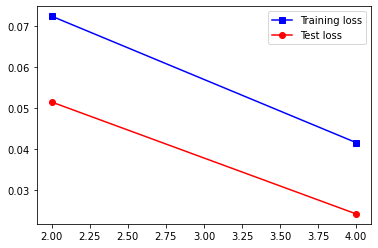

In [60]:
neuron = np.arange(2, 5, 2)
loss_tr = []
loss_te = []
for n in neuron:
    model = keras.Sequential()
    model.add(keras.layers.LSTM(n, input_shape=(X_train.shape[1], 1), activation="relu"))
    model.add(keras.layers.Dense(3, activation="linear"))
    model.compile(loss="mse", metrics="mse", optimizer=opt)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=20)
    y_train_pre = model.predict(X_train)
    y_test_pre = model.predict(X_test)
    loss_tr.append(np.mean((y_train_pre - y_train)**2))
    loss_te.append(np.mean((y_test_pre - y_test)**2))
    
plt.plot(neuron, loss_tr, "bs-")
plt.plot(neuron, loss_te, "ro-")
plt.legend(["Training loss", "Test loss"])
plt.show()

## Model training 

In [64]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = keras.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(X_train.shape[1], 1), activation="relu"))
model.add(keras.layers.Dense(3, activation="linear"))
model.compile(loss="mse", metrics="mse", optimizer=opt)
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
378/378 [==============================] - 3s 6ms/step - loss: 2.0761 - mse: 2.0761 - val_loss: 1.4877 - val_mse: 1.4877
Epoch 2/100
378/378 [==============================] - 2s 6ms/step - loss: 1.4265 - mse: 1.4265 - val_loss: 1.1661 - val_mse: 1.1661
Epoch 3/100
378/378 [==============================] - 2s 6ms/step - loss: 1.1648 - mse: 1.1648 - val_loss: 1.0466 - val_mse: 1.0466
Epoch 4/100
378/378 [==============================] - 2s 6ms/step - loss: 0.9966 - mse: 0.9966 - val_loss: 0.8876 - val_mse: 0.8876
Epoch 5/100
378/378 [==============================] - 2s 6ms/step - loss: 0.8474 - mse: 0.8474 - val_loss: 0.7678 - val_mse: 0.7678
Epoch 6/100
378/378 [==============================] - 2s 6ms/step - loss: 0.7429 - mse: 0.7429 - val_loss: 0.6836 - val_mse: 0.6836
Epoch 7/100
378/378 [==============================] - 2s 6ms/step - loss: 0.6519 - mse: 0.6519 - val_loss: 0.4850 - val_mse: 0.4850
Epoch 8/100
378/378 [==============================] - 2s 6ms/step - 

378/378 [==============================] - 2s 6ms/step - loss: 0.0679 - mse: 0.0679 - val_loss: 0.0496 - val_mse: 0.0496
Epoch 62/100
378/378 [==============================] - 2s 6ms/step - loss: 0.0649 - mse: 0.0649 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 63/100
378/378 [==============================] - 2s 6ms/step - loss: 0.0645 - mse: 0.0645 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 64/100
378/378 [==============================] - 2s 6ms/step - loss: 0.0667 - mse: 0.0667 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 65/100
378/378 [==============================] - 2s 6ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 66/100
378/378 [==============================] - 2s 6ms/step - loss: 0.0641 - mse: 0.0641 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 67/100
378/378 [==============================] - 2s 6ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 68/100
378/378 [==============================] - 2s 6ms/step - loss:

## Evaluation step

In [65]:
y_pre = model.predict(X_test)
y_pre.shape

(5181, 3)

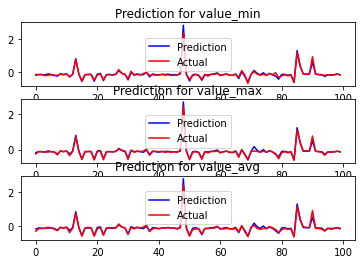

In [69]:
plt.subplot(311)
plt.plot(y_pre[0:200, 0], "b")
plt.plot(y_test[0:200, 0], "r")
plt.title("Prediction for value_min")
plt.legend(["Prediction", "Actual"])
plt.subplot(312)
plt.plot(y_pre[0:10, 1], "b")
plt.plot(y_test[0:100, 1], "r")
plt.title("Prediction for value_max")
plt.legend(["Prediction", "Actual"])
plt.subplot(313)
plt.plot(y_pre[0:100, 2], "b")
plt.plot(y_test[0:100, 2], "r")
plt.title("Prediction for value_avg")
plt.legend(["Prediction", "Actual"])
plt.show()

In [70]:
error_1 = y_pre[:, 0] - y_test[:, 0]
error_2 = y_pre[:, 1] - y_test[:, 1]
error_3 = y_pre[:, 2] - y_test[:, 2]
print(np.mean(error_1), np.std(error_1))
print(np.mean(error_2), np.std(error_2))
print(np.mean(error_3), np.std(error_3))

0.01002928700267817 0.16509028370913456
0.022221067154346606 0.15454092780600925
0.02054855932434038 0.15146600153557815
